# 03. MVPs
A number of simple models to test initial assumptions

In [30]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from modules.fm_functions import *
predict_columns = FM_columns[2:]

Load data

In [33]:
import pandas as pd
combined_data = pd.read_csv('./data/combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [34]:
combined_data.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Youcef Belaïli,1,0.513527,0.512050,0.419222,0.099565,0.609974,0.616573,0.164482,0.033113,0.005737,...,12,11,14,14,12,9,12,14,13,11
Romain Hamouma,1,0.437854,0.242553,0.134042,0.106117,0.216704,0.219048,0.070122,0.000000,0.000000,...,13,6,14,14,12,8,13,13,12,12
Youssouf Koné,1,0.580240,1.000000,1.000000,1.000000,0.340354,0.000000,0.495600,0.674216,0.201548,...,14,10,14,12,12,9,14,14,15,13
Thomas Mangani,1,0.975392,0.785929,0.615300,0.401151,0.877716,0.266163,0.681635,0.298842,0.131353,...,17,13,12,11,14,12,14,11,15,14
Riad Nouri,1,0.279058,0.405789,0.341717,0.157807,0.460373,0.279212,0.335181,0.094644,0.024060,...,12,6,13,15,12,8,14,13,12,11


In [35]:
X = combined_data[all_stats_columns]
y = combined_data[predict_columns]

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MVP: Ordinary Least Squares

In [37]:
from sklearn.linear_model import ElasticNet

# Initialize the model
eln = ElasticNet(random_state=42)

# Fit the model
eln.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {eln.score(X_train, y_train)}')
print(f'R^2 (test): {eln.score(X_test, y_test)}')

Elastic net R^2 (train): 0.019766202933834236
Elastic net R^2 (test): 0.016714010216370513


## MVP: Partial Least Squares

In [71]:
from sklearn.cross_decomposition import PLSRegression

# Initialize the model
pls = PLSRegression()

# Fit the model
pls.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {pls.score(X_train, y_train)}')
print(f'R^2 (test): {pls.score(X_test, y_test)}')

Elastic net R^2 (train): 0.25943744482129827
Elastic net R^2 (test): 0.2553317779631692


## MVP: Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model
rfr.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {rfr.score(X_train, y_train)}')
print(f'R^2 (test): {rfr.score(X_test, y_test)}')

Elastic net R^2 (train): 0.3891584381031748
Elastic net R^2 (test): 0.310207344543473


## MVP: Extra Trees

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize the model
etr = ExtraTreesRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model
etr.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {etr.score(X_train, y_train)}')
print(f'R^2 (test): {etr.score(X_test, y_test)}')

Elastic net R^2 (train): 0.36493062827492384
Elastic net R^2 (test): 0.3099213115872231


## MVP: MultiOutputRegressor with AdaBoost

In [118]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
abr = AdaBoostRegressor(n_estimators=10)

# Fit the model
mor = MultiOutputRegressor(estimator=abr).fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {mor.score(X_train, y_train)}')
print(f'R^2 (test): {mor.score(X_test, y_test)}')

R^2 (train): 0.4016040496655661
R^2 (test): 0.2988448811324658


## MVP: RegressorChain with AdaBoost

In [121]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
abr = AdaBoostRegressor(n_estimators=10)

# Fit the model
rch = RegressorChain(base_estimator=abr).fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {rch.score(X_train, y_train)}')
print(f'R^2 (test): {rch.score(X_test, y_test)}')

R^2 (train): 0.30760415439067323
R^2 (test): 0.26609346952908713


## MVP: simple NN

In [206]:
from sklearn.neural_network import MLPRegressor

# Initialize the model
mlp = MLPRegressor(hidden_layer_sizes=(25,50,25,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Evaluate the model
print(f'R^2 (train): {mlp.score(X_train, y_train)}')
print(f'R^2 (test): {mlp.score(X_test, y_test)}')

R^2 (train): 0.3424992862753753
R^2 (test): 0.30521780020818123


## Playground

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
from modules.fm_functions import *
import warnings

warnings.filterwarnings(action='ignore')

In [208]:
def smith_waterman(s1, s2, match_score=2, gap_cost=1):
    """
    Compute the Smith-Waterman score between two strings.
    
    :param s1: First string.
    :param s2: Second string.
    :param match_score: Score for character match.
    :param gap_cost: Cost for gap (insertion/deletion).
    :return: The Smith-Waterman score for the best local alignment.
    """
    m, n = len(s1), len(s2)
    score_matrix = [[0] * (n + 1) for _ in range(m + 1)]
    max_score = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if s1[i - 1] == s2[j - 1] else -match_score)
            delete = score_matrix[i - 1][j] - gap_cost
            insert = score_matrix[i][j - 1] - gap_cost
            score_matrix[i][j] = max(0, match, delete, insert)
            max_score = max(max_score, score_matrix[i][j])

    return max_score

def find_most_similar_strings(target, strings, n=5):
    """
    Find the n most similar strings to the target string from a list of strings using Smith-Waterman score.
    
    :param target: The target string to compare against.
    :param strings: A list of strings to search within.
    :param n: The number of most similar strings to return. Default is 5.
    :return: A list of the n most similar strings.
    """
    # Compute the Smith-Waterman score for each string in the list
    scores = [(string, smith_waterman(target, string)) for string in strings]
    
    # Find the n strings with the highest scores
    most_similar = sorted(scores, key=lambda x: x[1], reverse=True)[:n]
    
    # Extract and return only the strings (not the scores)
    return [string for string, score in most_similar]

In [209]:
find_most_similar_strings('millot', X.index)

['Enzo Millot',
 'Francisco Portillo',
 'Romain Del Castillo',
 'Joe Willock',
 'Jeison Murillo']

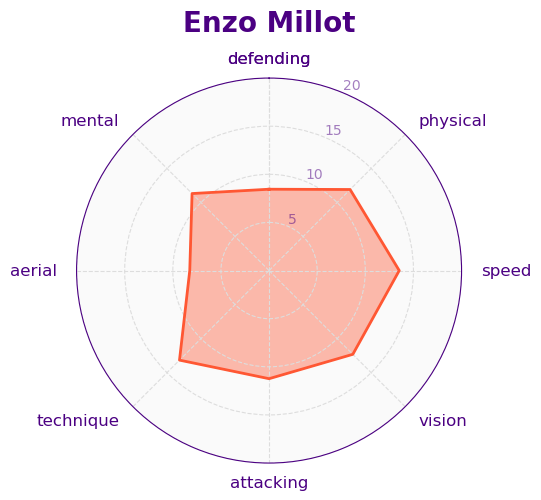

In [210]:
test_name = 'Enzo Millot'

model = mlp

predictions = model.predict(X.loc[[test_name]].values)

test = pd.Series(predictions[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

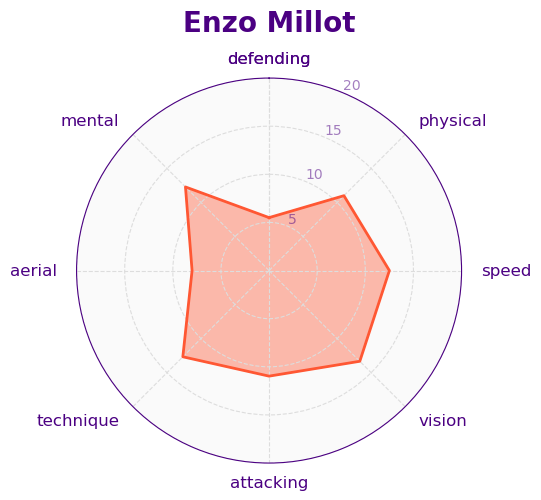

In [211]:
real = y.loc[[test_name]].values

test = pd.Series(real[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

In [212]:
pd.DataFrame({'prediction':predictions[0],
              'real':real[0]},
              index=predict_columns)

,prediction,real
Corners,10.091048,10
Crossing,11.791957,12
Dribbling,13.254154,12
Finishing,10.096464,8
First Touch,12.556771,13
Free Kick Taking,9.497771,11
Heading,7.804465,8
Long Shots,10.620810,11
Long Throws,6.525189,3
Marking,7.391613,3


In [213]:
print(f'Prediction mean : {predictions[0].mean()}')
print(f'Real mean : {real[0].mean()}')

Prediction mean : 11.012977374232083
Real mean : 10.88888888888889


In [172]:
X_test.index

Index(['Rico Henry', 'Gian Marco Ferrari', 'Simon Terodde', 'Vladimír Coufal',
       'Matty Cash', 'Patrik Schick', 'Francesco Caputo', 'Pape Gueye',
       'Raúl Albiol', 'Josuha Guilavogui',
       ...
       'Vitaly Janelt', 'Sargis Adamyan', 'Andrea Cambiaso',
       'James Ward-Prowse', 'Duván Zapata', 'Álvaro Aguado',
       'Brecht Dejaegere', 'Georginio Wijnaldum', 'Jeffrey Gouweleeuw',
       'Daniele Verde'],
      dtype='object', name='Name', length=304)